## ```NoteBook Focus```
---
1. More modeling to figure out why the IMbalanced classes model is performing so well.


## ```Imports```
---

In [1]:
import pandas as pd
import numpy as np
from classifiers_copy import classify
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function that trains a logreg and returns a confusion matrix plot so that we can evaluate the misclassifications. 
def logreg(X_train,X_test,y_train,y_test):
    # instantiate, train, evaluate
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    # evaluate
    print(f"train acc: {logreg.score(X_train,y_train)}")
    print(f"test acc: {logreg.score(X_test,y_test)}")
    
    return plot_confusion_matrix(logreg, X_test, y_test, cmap='BuGn', display_labels=['no prison time', 'prison time'])

## ```Modeling after EDA1```
---
1. I'm going to try a model on IMbalanced classes with less features to see how the model performs. I'm expecting for they're to be a drop in performance.

In [3]:
drugs = pd.read_csv('../Claire/data/drugs_2020_simply_imputed.csv')
drugs.head()

,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


In [4]:
drugs['prisdum'].value_counts(normalize=True)

# 0 = no prison time
# 1 = prison time

1    0.955196
0    0.044804
Name: prisdum, dtype: float64

In [5]:
drugs.drop(columns='educatn', inplace=True)

In [6]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'intdum', 'methmin', 'monrace', 'monsex', 'mweight', 'newcit',
       'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen', 'offguide',
       'prisdum', 'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
       'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety',
       'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1', 'sources',
       'statmax', 'statmin', 'supermax', 'supermin', 'suprdum', 'suprel',
       'timservc', 'totchpts', 'totrest', 'totunit', 'typemony', 'typeoths',
       'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor', 'xminsor',
       'sentrnge'],
      dtype='object')

In [7]:
# model with IM_balanced classes

#set up X/y
X = drugs[['age','drugmin','neweduc','quarter','sources',
           'statmax', 'statmin', 'supermax', 'supermin','suprel',
           'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
           'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
           'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor'
          ]]
y = drugs['prisdum']

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.7, stratify=y)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train multiple models
imbalanced_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [8]:
imbalanced_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.980221,0.974847,0.005374,0.989711,0.986933,0.002778,0.983586,0.979575,0.004011,0.995912,0.994402,0.001510
logreg,0.989134,0.989701,0.000567,0.994313,0.994605,0.000292,0.994224,0.995431,0.001207,0.994401,0.993780,0.000621
dt,1.000000,0.986532,0.013468,1.000000,0.992943,0.007057,1.000000,0.993975,0.006025,1.000000,0.991914,0.008086
bag,0.998812,0.989899,0.008913,0.999378,0.994708,0.004670,0.999555,0.995638,0.003918,0.999200,0.993780,0.005420
bag_knn,0.980900,0.972866,0.008034,0.990063,0.985907,0.004156,0.984022,0.978359,0.005664,0.996178,0.993572,0.002606
bag_log,0.989134,0.989305,0.000171,0.994314,0.994397,0.000084,0.994049,0.995223,0.001175,0.994579,0.993572,0.001006
rf,1.000000,0.992474,0.007526,1.000000,0.996062,0.003938,1.000000,0.995649,0.004351,1.000000,0.996475,0.003525
et,1.000000,0.987720,0.012280,1.000000,0.993600,0.006400,1.000000,0.989311,0.010689,1.000000,0.997927,0.002073
ada,0.990747,0.989503,0.001244,0.995155,0.994502,0.000654,0.995377,0.995224,0.000152,0.994934,0.993780,0.001154
gboost,0.994567,0.992870,0.001697,0.997157,0.996267,0.000889,0.996979,0.996474,0.000506,0.997334,0.996061,0.001273


train acc: 0.9891341256366724
test acc: 0.9897009308774015


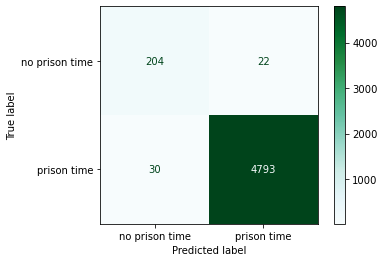

In [9]:
logreg(X_train_ss, X_test_ss, y_train, y_test)

**The model is performing well like we expected, misclassifying the minority class with frequency. More EDA and going through the data dictionary are my next steps in EDA2.**

In [10]:
demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn', 'educatn']

# delete neweduc or educatn, they're the same variable

To-Do list:
---
1. Try PCA on data
2. Work on demographic vs no demographic models
3. Try an imbalance class correcter like Smote

## ```Smote Balanced Classes Model```
---

In [11]:
from imblearn.over_sampling import SMOTE
# Instantiate smote class object
smo = SMOTE(random_state=42)

#set up X/y
X = drugs[['age','drugmin','neweduc','quarter','sources',
           'statmax', 'statmin', 'supermax', 'supermin','suprel',
           'timservc', 'totchpts', 'totrest', 'totunit', 'typemony',
           'reas2', 'reas3', 'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe',
           'typeoths', 'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor'
          ]]
y = drugs['prisdum']
print(f"Target Prisdum value_counts: {y.value_counts()}")

print('====')
# Synthetically
X_smo, y_smo = smo.fit_resample(X,y)
print(f"Smote Target Prisdum value_counts: {y_smo.value_counts()}")

Target Prisdum value_counts: 1    16075
0      754
Name: prisdum, dtype: int64
====
Smote Target Prisdum value_counts: 1    16075
0    16075
Name: prisdum, dtype: int64


In [12]:
# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train multiple models
smote_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [13]:
smote_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.985248,0.978642,0.006606,0.985038,0.978206,0.006833,0.999269,0.998488,0.000780,0.971208,0.958731,0.012477
logreg,0.977338,0.975428,0.001911,0.977033,0.975013,0.002020,0.990414,0.991636,0.001223,0.964010,0.958938,0.005071
dt,1.000000,0.992535,0.007465,1.000000,0.992528,0.007472,1.000000,0.993353,0.006647,1.000000,0.991705,0.008295
bag,0.999245,0.994712,0.004532,0.999244,0.994703,0.004541,0.999911,0.996255,0.003656,0.998578,0.993156,0.005422
bag_knn,0.985159,0.977812,0.007347,0.984950,0.977350,0.007600,0.999086,0.998054,0.001031,0.971208,0.957487,0.013721
bag_log,0.977250,0.975428,0.001822,0.976937,0.975013,0.001924,0.990591,0.991636,0.001045,0.963654,0.958938,0.004716
rf,1.000000,0.995749,0.004251,1.000000,0.995744,0.004256,1.000000,0.996882,0.003118,1.000000,0.994608,0.005392
et,1.000000,0.996164,0.003836,1.000000,0.996159,0.003841,1.000000,0.997298,0.002702,1.000000,0.995023,0.004977
ada,0.992313,0.991498,0.000815,0.992292,0.991460,0.000831,0.995085,0.995816,0.000731,0.989514,0.987142,0.002372
gboost,0.995468,0.993261,0.002207,0.995457,0.993231,0.002226,0.997768,0.997490,0.000278,0.993157,0.989009,0.004149


train acc: 0.9773383692512775
test acc: 0.9754276827371695


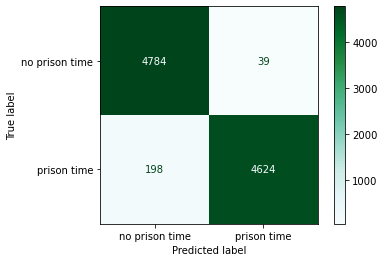

In [14]:
logreg(X_train_ss, X_test_ss, y_train, y_test)

**This is how we expected our model to run with demographic columns on balanced datasets. Now we're going to compare it to a model without the demographic features in it.**

In [15]:
# demographic columns to drop
demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn']

#set up X/y
X = drugs.drop(columns=['prisdum']+demographic_columns)
y = drugs['prisdum']
print(f"Target Prisdum value_counts: {y.value_counts()}")

print('====')
# Synthetically
X_smo, y_smo = smo.fit_resample(X,y)
print(f"Smote Target Prisdum value_counts: {y_smo.value_counts()}")

Target Prisdum value_counts: 1    16075
0      754
Name: prisdum, dtype: int64
====
Smote Target Prisdum value_counts: 1    16075
0    16075
Name: prisdum, dtype: int64


In [16]:
# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# train multiple models
no_demo_smote_class_scores = classify(X_train_ss,X_test_ss,y_train,y_test)

In [17]:
no_demo_smote_class_scores

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.997778,0.996164,0.001614,0.997774,0.996150,0.001624,0.999822,0.999582,0.000239,0.995734,0.992742,0.002993
logreg,0.998445,0.998237,0.000207,0.998444,0.998235,0.000209,0.999110,0.999376,0.000266,0.997778,0.997097,0.000682
dt,1.000000,0.999585,0.000415,1.000000,0.999585,0.000415,1.000000,0.999378,0.000622,1.000000,0.999793,0.000207
bag,1.000000,0.999689,0.000311,1.000000,0.999689,0.000311,1.000000,0.999585,0.000415,1.000000,0.999793,0.000207
bag_knn,0.997867,0.996475,0.001392,0.997863,0.996463,0.001400,0.999822,0.999583,0.000239,0.995912,0.993364,0.002548
bag_log,0.998445,0.998030,0.000415,0.998444,0.998027,0.000416,0.999199,0.999376,0.000177,0.997690,0.996682,0.001008
rf,1.000000,0.999793,0.000207,1.000000,0.999793,0.000207,1.000000,1.000000,0.000000,1.000000,0.999585,0.000415
et,1.000000,0.999689,0.000311,1.000000,0.999689,0.000311,1.000000,1.000000,0.000000,1.000000,0.999378,0.000622
ada,1.000000,0.999896,0.000104,1.000000,0.999896,0.000104,1.000000,0.999793,0.000207,1.000000,1.000000,0.000000
gboost,1.000000,0.999793,0.000207,1.000000,0.999793,0.000207,1.000000,0.999793,0.000207,1.000000,0.999793,0.000207


train acc: 0.9984447900466563
test acc: 0.9982374287195438


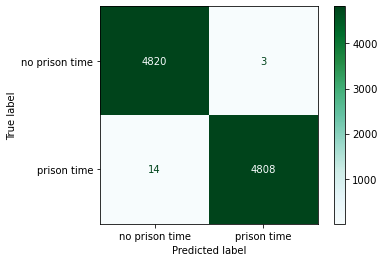

In [18]:
logreg(X_train_ss, X_test_ss, y_train, y_test)

In [19]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'intdum', 'methmin', 'monrace', 'monsex', 'mweight', 'newcit',
       'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen', 'offguide',
       'prisdum', 'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
       'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety',
       'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1', 'sources',
       'statmax', 'statmin', 'supermax', 'supermin', 'suprdum', 'suprel',
       'timservc', 'totchpts', 'totrest', 'totunit', 'typemony', 'typeoths',
       'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor', 'xminsor',
       'sentrnge'],
      dtype='object')

train acc: 0.9943568095978671
test acc: 0.9950233281493002


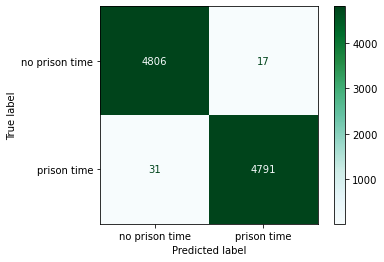

In [20]:
# With demographic data on imbalanced classes
demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn','newcit']

# set up X/y
X = drugs[['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn','newcit',
          'accgdln', 'altdum', 'amttotal', 'casetype', 'citwhere',
          'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
          'intdum', 'methmin', 'mweight','nodrug', 'numdepen', 'offguide',
          'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
           'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety'
         ]]
y = drugs['prisdum']

# boost minor class value count
X_smo, y_smo = smo.fit_resample(X,y)

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# function to train model
logreg(X_train_ss, X_test_ss, y_train, y_test)

In [21]:
drugs.columns

Index(['accgdln', 'age', 'altdum', 'amttotal', 'casetype', 'citwhere',
       'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
       'intdum', 'methmin', 'monrace', 'monsex', 'mweight', 'newcit',
       'newcnvtn', 'neweduc', 'newrace', 'nodrug', 'numdepen', 'offguide',
       'prisdum', 'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
       'regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety',
       'senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1', 'sources',
       'statmax', 'statmin', 'supermax', 'supermin', 'suprdum', 'suprel',
       'timservc', 'totchpts', 'totrest', 'totunit', 'typemony', 'typeoths',
       'unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor', 'xminsor',
       'sentrnge'],
      dtype='object')

train acc: 0.9944456787380582
test acc: 0.9948159668221876
train acc: 0.9473894690068874
test acc: 0.9475375842405391
train acc: 0.9829815596534104
test acc: 0.9828926905132193


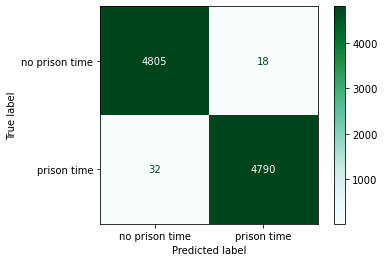

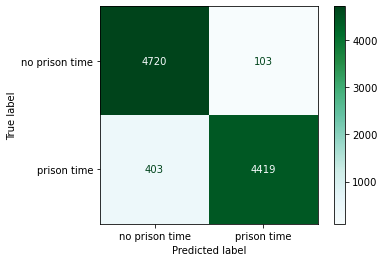

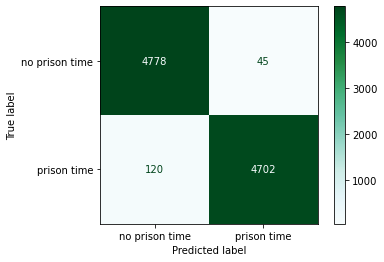

In [22]:
# Running a for loop that runs new models with different sets of features added to the training process. 
# The purpose is to filter out less important or features that are leaking information into the test set. 
# If the model misclassifies a ton of cases with a certain group of features added, then those are not as important to
# to the training process and can be removed. 

demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn','newcit']

feature_list = [
#                 ['accgdln', 'altdum', 'amttotal', 'casetype', 'citwhere'],
                ['probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3'],
#                 ['regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety'],
                [ 'sensplt0', 'smax1', 'smin1', 'sources'],
                ['statmax', 'statmin', 'supermax', 'supermin', 'suprel']
#                 ['timservc', 'totchpts', 'totrest', 'totunit', 'typemony', 'typeoths'],
#                 ['unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor', 'xminsor']
               ]

for list_i in feature_list:
    # set up X/y
    X = drugs[[
            'accgdln', 'altdum', 'amttotal', 'casetype', 'citwhere',
            'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
            'intdum', 'methmin', 'mweight','nodrug','numdepen','offguide'
             ]+list_i+demographic_columns]
    y = drugs['prisdum']

    # boost minor class value count
    X_smo, y_smo = smo.fit_resample(X,y)

    # set train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

    # scale data
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.transform(X_test)

    # function to train model
    logreg(X_train_ss, X_test_ss, y_train, y_test)

**The for loop above trained different models with different sets of features added to the existing features to see which features performed better. These are the results above of each added set of features, the misclassifications were similar to the previous models were we used all the features. Basically these features are crucial to the modeling process, so they were saved for the model hypertunning.**

**In this process I have figured out which features were leaking information into the test sets. Features ['senspcap','sentimp'] were removed from the 2nd iteration in the for loop and the mislcassification significantly increased by 400 cases. I double checked the data dicitonary and these features are truly giving away vital information. This explains why our models trained on imbalanced classes was performing so well.**

- **senspcap:** The total prison sentence, in months

- **sentimp:** Indicates what type of sentence was given  

train acc: 0.8351921795156632
test acc: 0.8391912908242612
train acc: 0.8652743834703399
test acc: 0.8699844479004666
train acc: 0.8570095534325706
test acc: 0.8633488854328668


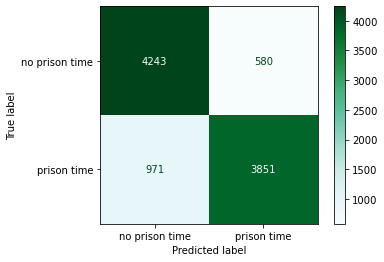

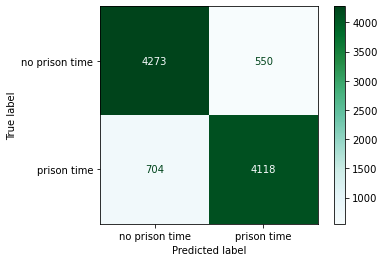

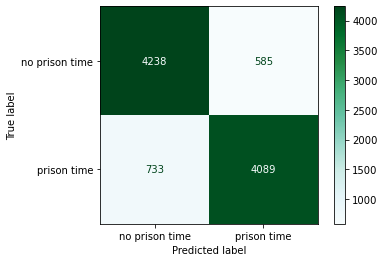

In [23]:
feature_list = [
#                 ['accgdln', 'altdum', 'amttotal', 'casetype', 'citwhere'],
#                 ['probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3'],
                ['regsxmin', 'relmin', 'restdet1', 'restdum', 'safe', 'safety'],
#                 ['senspcap', 'sensplt0', 'sentimp', 'smax1', 'smin1', 'sources'],
#                 ['statmax', 'statmin', 'supermax', 'supermin', 'suprdum', 'suprel'],
                ['timservc', 'totchpts', 'totrest', 'totunit', 'typemony', 'typeoths'],
                ['unit1', 'mwgt1', 'wgt1', 'xcrhissr', 'xfolsor', 'xmaxsor', 'xminsor']
               ]

for list_i in feature_list:
    # set up X/y
    X = drugs[[
            'accgdln', 'altdum', 'amttotal', 'casetype', 'citwhere',
            'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
            'intdum', 'methmin', 'mweight','nodrug','numdepen','offguide'
             ]+list_i]
    y = drugs['prisdum']

    # boost minor class value count
    X_smo, y_smo = smo.fit_resample(X,y)

    # set train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

    # scale data
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.transform(X_test)

    # function to train model
    logreg(X_train_ss, X_test_ss, y_train, y_test)

**The for loop above trained different models with different sets of features added to the existing features to see which features performed better. These are the results above of each added set of features, the misclassification significantly increased in each iteration. Basically these features are not crucial to the modeling process, so they were dropped.**

In [24]:
['altdum','smax1', 'smin1', 'suprdum','suprdum','suprel']

['altdum', 'smax1', 'smin1', 'suprdum', 'suprdum', 'suprel']

train acc: 0.9943568095978671
test acc: 0.994504924831519


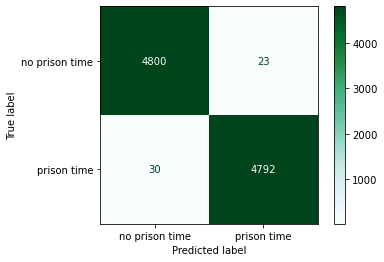

In [25]:
# Model withOUT demographic features, reduced features, and SMOte enhanced minority class.

# set up X/y
X = drugs[[ 
            'accgdln', 'amttotal', 'casetype', 'citwhere',
            'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
            'intdum', 'methmin', 'mweight','nodrug','numdepen','offguide',
            'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
              'sources',
            'statmax', 'statmin', 'supermax', 'supermin', 
            
         ]]
y = drugs['prisdum']

# boost minor class value count
X_smo, y_smo = smo.fit_resample(X,y)

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# function to train model
logreg(X_train_ss, X_test_ss, y_train, y_test)

**This model is performing really well and only misclassifying a very small amount cases. The next model will be trained with demographic features to compare to this model.**

In [26]:
# WITHOUT demographic features
classify(X_train_ss, X_test_ss, y_train, y_test)

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.996090,0.993779,0.002311,0.996083,0.993769,0.002313,0.997948,0.995216,0.002732,0.994224,0.992327,0.001897
logreg,0.994357,0.994505,0.000148,0.994356,0.994500,0.000144,0.994489,0.995223,0.000734,0.994224,0.993779,0.000445
dt,0.999956,0.998030,0.001925,0.999956,0.998029,0.001927,1.000000,0.998547,0.001453,0.999911,0.997511,0.002400
bag,0.999778,0.998445,0.001333,0.999778,0.998445,0.001333,0.999645,0.998341,0.001303,0.999911,0.998548,0.001363
bag_knn,0.996312,0.993572,0.002740,0.996305,0.993559,0.002746,0.998305,0.995420,0.002884,0.994313,0.991705,0.002608
bag_log,0.994224,0.994609,0.000385,0.994223,0.994606,0.000383,0.994312,0.995019,0.000707,0.994135,0.994193,0.000058
rf,0.999956,0.998756,0.001200,0.999956,0.998755,0.001200,1.000000,0.999170,0.000830,0.999911,0.998341,0.001570
et,0.999956,0.998445,0.001511,0.999956,0.998444,0.001512,1.000000,0.998962,0.001038,0.999911,0.997926,0.001985
ada,0.997778,0.997304,0.000474,0.997778,0.997304,0.000474,0.998044,0.997304,0.000740,0.997512,0.997304,0.000208
gboost,0.999067,0.997926,0.001140,0.999067,0.997927,0.001140,0.998845,0.997513,0.001332,0.999289,0.998341,0.000948


In [27]:
['altdum','smax1', 'smin1', 'suprdum','suprdum','suprel']

['altdum', 'smax1', 'smin1', 'suprdum', 'suprdum', 'suprel']

In [29]:
# 'accgdln', 'casetype', 'citwhere', 'combdrg2', 'crimhist', 'disposit', 
#             'district', 'drugmin', 'dsplea', 'intdum', 'methmin', 'mweight','nodrug',
#             'offguide', 'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3', 
#             'sources', 'statmax', 'statmin',
#             'age', 'newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn'

train acc: 0.9946234170184404
test acc: 0.9949196474857439


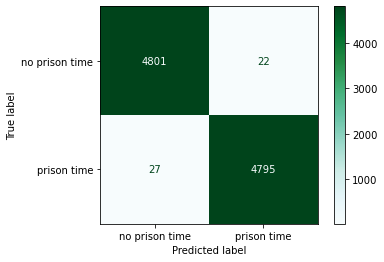

In [30]:
# Model with demographic features, reduced features, and SMOte enhanced minority class. 

demographic_columns=['age','newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn','newcit', 'citwhere']

# set up X/y
X = drugs[[ 
            'accgdln', 'amttotal', 'casetype',
            'combdrg2', 'crimhist', 'disposit', 'district', 'drugmin', 'dsplea',
            'intdum', 'methmin', 'mweight','nodrug','numdepen','offguide',
            'probatn', 'probdum', 'quarter', 'reas1', 'reas2', 'reas3',
              'statmax', 'statmin','sources',
             'supermax', 'supermin', 
            
         ]+demographic_columns]
y = drugs['prisdum']

# boost minor class value count
X_smo, y_smo = smo.fit_resample(X,y)

# set train/test split
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,random_state=42, train_size=0.7, stratify=y_smo)

# scale data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# function to train model
logreg(X_train_ss, X_test_ss, y_train, y_test)

**This model is performing really well and only misclassifying a very small amount cases. With the demographic features the model slightly performed better than the previous model that excludes demographic features, by misclassifying less cases.**

In [31]:
# WITH demographic features
classify(X_train_ss, X_test_ss, y_train, y_test)

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.995557,0.993364,0.002192,0.995542,0.993336,0.002206,0.998837,0.997491,0.001347,0.992269,0.989216,0.003053
logreg,0.994623,0.994920,0.000296,0.994622,0.994916,0.000295,0.994932,0.995433,0.000501,0.994313,0.994401,0.000088
dt,1.000000,0.997823,0.002177,1.000000,0.997821,0.002179,1.000000,0.998339,0.001661,1.000000,0.997304,0.002696
bag,0.999911,0.998341,0.001570,0.999911,0.998341,0.001571,0.999822,0.998548,0.001275,1.000000,0.998134,0.001866
bag_knn,0.995601,0.993675,0.001925,0.995586,0.993646,0.001940,0.999016,0.998117,0.000899,0.992180,0.989216,0.002964
bag_log,0.994535,0.995127,0.000592,0.994534,0.995124,0.000590,0.994667,0.995640,0.000974,0.994401,0.994608,0.000207
rf,1.000000,0.998860,0.001140,1.000000,0.998859,0.001141,1.000000,0.999585,0.000415,1.000000,0.998134,0.001866
et,1.000000,0.998237,0.001763,1.000000,0.998235,0.001765,1.000000,0.999584,0.000416,1.000000,0.996889,0.003111
ada,0.998134,0.997926,0.000207,0.998134,0.997926,0.000208,0.998134,0.997926,0.000208,0.998134,0.997926,0.000208
gboost,0.999422,0.998341,0.001081,0.999422,0.998341,0.001082,0.999378,0.998548,0.000830,0.999467,0.998134,0.001333


In [32]:
# checking misclassifications
lr = LogisticRegression()
lr.fit(X_train_ss,y_train)


preds = np.round(lr.predict(X_test_ss),0)
misclass1 = []
for row_index, (input, prediction, label) in enumerate(zip (X_test_ss, preds, y_test)):
    if prediction != label:
        misclass1.append(row_index)
        print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)

Row 52 has been classified as  1 and should be  0
Row 98 has been classified as  0 and should be  1
Row 167 has been classified as  0 and should be  1
Row 353 has been classified as  1 and should be  0
Row 851 has been classified as  0 and should be  1
Row 863 has been classified as  1 and should be  0
Row 1041 has been classified as  0 and should be  1
Row 1190 has been classified as  0 and should be  1
Row 1393 has been classified as  0 and should be  1
Row 1406 has been classified as  0 and should be  1
Row 1556 has been classified as  1 and should be  0
Row 1986 has been classified as  0 and should be  1
Row 2033 has been classified as  1 and should be  0
Row 2573 has been classified as  0 and should be  1
Row 2603 has been classified as  1 and should be  0
Row 2641 has been classified as  1 and should be  0
Row 2983 has been classified as  1 and should be  0
Row 3358 has been classified as  1 and should be  0
Row 3457 has been classified as  0 and should be  1
Row 4037 has been cl

## ```Notebook Conclusion```
---
1. There is no significant difference in case misclassification from deomgraphic model and the model excluding the demographic features. The model with demographic features slightly performed better by misclassifying fewer cases, but not enough to justify that the justice system is broken. This is all based on the data and models.

2. The logreg model will be amongst the models used for the app i'm building. This model will provide the probabilities of each class. I want the app to give me the probability and class that recived the most votes.

3. The features in the train set that were leaking information into the test sets were identified and removed. 